# Linear Regression with Categorical Variables

Our previous work with linear regression involved cases where all the features were numeric (continuous).  In this tutorial, we consider linear regression with categorical (discrete) features.  This material is based on section 3.3.1 (pp 83-87) of *Introduction to Statistical Learning 2e*.

## Loading Packages

Let's begin by loading the packages that we will need.  Notice that in addition to **sklearn** we are also using **statsmodels**, which is a popular package that includes many classical statistical techniques.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading-In Data

Next, we'll read-in the data that we will be working with; it is the `Credit` data set from the `ISLR2` R package that can be downloaded from CRAN.

In [ ]:
df_credit = pd.read_csv('credit.csv')
df_credit.columns = df_credit.columns.str.lower()
df_credit

,income,limit,rating,cards,age,education,own,student,married,region,balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560
396,13.364,3838,296,5,65,17,No,No,No,East,480
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138
398,37.728,2525,192,1,44,13,No,No,Yes,South,0


The label is `balance` - average credit card debt for each individual

There are several quantitative features:
- `age` - in years
- `cards` - number of credit cards
- `education` - years of education
- `income` - in thousands of dollars
- `limit` - credit limit
- `rating` credit rating (FICO)

In addition to these quantitative variables, we also have four qualitative variables: 
- `own` - home ownership
- `student` - are they a student or not
- `status` - are they married or not
- `region` - geographic location (East, West, or South)

We can examine the pairwise relationships between the quantitative variables with the `seaborn.pairplot()` function.

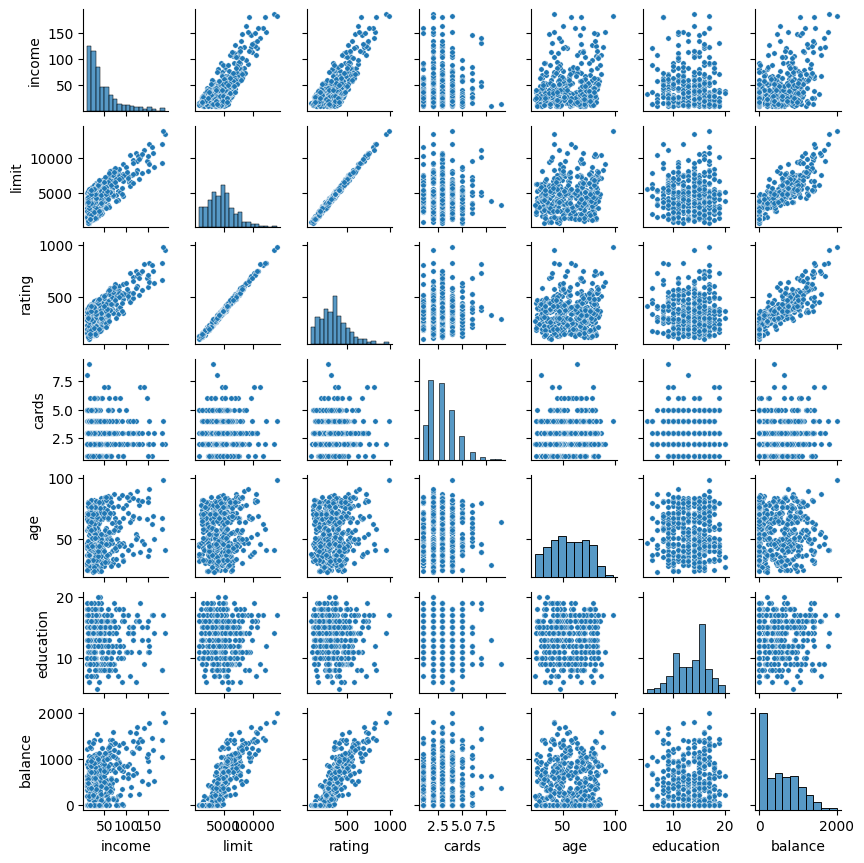

In [ ]:
sns.pairplot(df_credit, height=1.25, plot_kws={"s": 15}); 

## Categorical Feature with Two Levels

Suppose that we wish to investigate diﬀerences in credit card balance between those who own a house and those who don’t, ignoring the other variables. If a qualitative feature only has two possible values (also called *levels*), then incorporating it into a regression model is simple. We simply create an indicator or *dummy variable* that takes on two possible numerical values.  In particular, our dummy variable takes a value of zero for those who *don't* own a house, and a value of one for those who *do* own a house.  This technique is called one-hot encoding.

We can use `pandas.get_dummies()` to perform one-hot encoding.

In [ ]:
df_X = df_credit[['own']]
df_X = pd.get_dummies(df_X, drop_first=True, dtype='float')
df_X.head()

,own_Yes
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


Let's isolate our labels into their own `DataFrame`.

In [ ]:
df_y = df_credit[['balance']]
df_y.head()

,balance
0,333
1,903
2,580
3,964
4,331


### Using **sklearn**

We'll first perform a linear regression using **sklearn**.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df_X, df_y)

LinearRegression()

We can examine the intercept and coefficient as follows.

In [ ]:
print(model.coef_)
print(model.intercept_)

[[19.73312308]]
[509.80310881]


Let's make these values easier to read by putting them into a `DataFrame`.

In [ ]:
df_coef = pd.DataFrame(
    data = {'coefficient': list(model.intercept_) + list(np.ravel(model.coef_))},
    index = ['intercept'] + list(df_X.columns.values), 
)
df_coef

,coefficient
intercept,509.803109
own_Yes,19.733123


### Using **statsmodels**

Next, let's perform the same the same linear regression using `statsmodels` which will allow us to check for statistical significance by examining $p$-values.

In [ ]:
df_X_sm = sm.add_constant(df_X)
ls = sm.OLS(df_y, df_X_sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Tue, 29 Aug 2023   Prob (F-statistic):              0.669
Time:                        13:35:04   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        509.8031     33.128     15.389      0.0

Here is how to interpret these results:
- A non-home owner has an average balance of \$509.80
- A home owner has an average balance of 509.80 + 19.73 = \$529.53
- However, notice that the $p$-value of `own_Yes` is quite high which suggests that there is no statistical evidence of a diﬀerence in average credit card
balance based on house ownership. 

## Categorical Feature with Multiple Levels

In this section we consider regression on a categorical feature that has multiple levels.  When a qualitative feature has more than two levels, a single dummy variable cannot represent all possible values. In this situation we can create additional dummy variables.  There will always be one fewer dummy variable than the number of levels.

To explore this technique, let's use the `region` feature and create dummy variables using the `pandas.get_dummies()` function.

In [ ]:
df_X = df_credit[['region']]
df_X = pd.get_dummies(df_X, drop_first=True, dtype='float')
df_X.head()

,region_South,region_West
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


Next, let's use **sklearn** to perform a linear regression with the dummy variables.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df_X, df_y)

LinearRegression()

We can examine the coefficients in a `DataFrame` as follows:

In [ ]:
df_coef = pd.DataFrame(
    data = {'coefficient': list(model.intercept_) + list(np.ravel(model.coef_))},
    index = ['intercept'] + list(df_X.columns.values), 
)
df_coef

,coefficient
intercept,531.000000
region_South,-12.502513
region_West,-18.686275


Finally, we'll use `statsmodels` to perform the same regression so that we can examine the $p$-values.

In [ ]:
df_X_sm = sm.add_constant(df_X)
ls = sm.OLS(df_y, df_X_sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Tue, 29 Aug 2023   Prob (F-statistic):              0.957
Time:                        13:37:01   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          531.0000     46.319     11.464   

Here is how to interpret these results:

- The average balance of a cardholder that lives in the `East` is \$531.00.
  
- A cardholder in the `South` has an average balance of 531.00 - 12.50 = \$518.50

- A cardholder in the `West` has an average balance of 531.00 - 18.67 = \$512.33

- The the $p$-values of both `region_South` and `region_West` are quite high which suggests that there is no statistical evidence of a diﬀerence in average credit card balance based on region. 